# Sentiment analysis of tweets using python

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import *
import warnings

## Loading dataset

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
train.shape

(31962, 3)

In [5]:
train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [6]:
train[train['label']==1].head()   #0 is positive 1 is negetive

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


## Data preprocessing

In [7]:
#stopwords
nltk.download('stopwords')
sword=set(stopwords.words('english'))


def clean_text(cmnt):
    #Remove mentions
    cmnt = re.sub(r'@[\w]*', '',cmnt) 
    
    #Remove RT
    cmnt = re.sub(r'RT', '', cmnt)
    
    #Remove punctuations
    cmnt = re.sub(r'[^\w\s]', '', cmnt)
    cmnt = re.sub(r'[?!.;:#-//,ð±[]]', '', cmnt)
    
    #Remove numbers
    cmnt = re.sub(r'[0-9]', '', cmnt)
    
    #Fix &
    cmnt = re.sub(r'&amp;', '&', cmnt)
     
    #Convert to lowercase to maintain consistency
    cmnt=cmnt.lower()

    #Tokenization
    cmnt=nltk.word_tokenize(cmnt)
    
    #Stemming
    ps = PorterStemmer()
    for w in cmnt:
        ps.stem(w)
    
    
    #lemmatization
    lemma = WordNetLemmatizer()
    for i in cmnt:
        lemma.lemmatize(i, pos="v")
    
#     #Stopwords remove
    #cmnt = " ".join([w for w in cmnt if w not in stopwords.words('english')])  
    cmnt = " ".join(cmnt)
    
    return (cmnt)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cromsa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [8]:
train['processed_tweets']=np.vectorize(clean_text)(train['tweet'])

In [9]:
train.head()

,id,label,tweet,processed_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they d...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in urð...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


## Exploratory Data Analysis

In [10]:
#Visualization of most frequent words
words = " ".join([x for x in train['processed_tweets']])

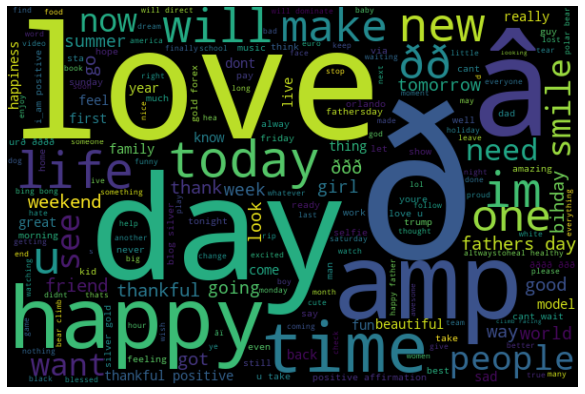

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud1 = WordCloud(width=500, height=500, random_state=40).generate(words)


plt.figure(figsize=(17,6))
plt.imshow(wordcloud1,interpolation='bilinear')
plt.axis('off')
plt.show()

## Feature Selection

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000, stop_words='english')
bow=bow_vectorizer.fit_transform(train['processed_tweets'])

In [14]:
#bow[0].toarray()

## Model Training

In [15]:
from sklearn.model_selection import train_test_split    #splitting dataset
X_train,X_test,Y_train,Y_test = train_test_split(bow,train['label'],random_state=42,test_size=0.25)


### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

In [17]:
#Training for model
model1=LogisticRegression()
model1.fit(X_train,Y_train)

LogisticRegression()

In [18]:
#Testing for model
prediction=model1.predict(X_test)
f1_score(Y_test,prediction)

0.4720496894409938

In [19]:
accuracy_score(Y_test,prediction)    #Accuracy=94.681%

0.9468151670629458

### Support Vector Machine

In [20]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,Y_train)

SVC()

In [21]:
svm.score(X_test,Y_test)

0.9464397447128019

### Naive Bayes Classifier

In [26]:
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB(alpha=0.8)
nb.fit(X_train,Y_train)


BernoulliNB(alpha=0.8)

In [27]:
nb.score(X_test,Y_test)

0.9359279189087724

### Random Forest Classifier 

In [29]:
from sklearn.ensemble import RandomForestClassifier
ref=RandomForestClassifier(n_estimators=135,
    criterion='gini',
    max_depth=None,
    max_features='auto',
    max_leaf_nodes=None,
    bootstrap=True,
    n_jobs=None,
    random_state=25,
)
ref.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=135, random_state=25)

In [30]:
ref.score(X_test,Y_test)

0.9383055937930171

### Comparision Between Models

In [33]:
plot_y=[svm.score(X_test,Y_test),nb.score(X_test,Y_test),ref.score(X_test,Y_test),accuracy_score(Y_test,prediction)]

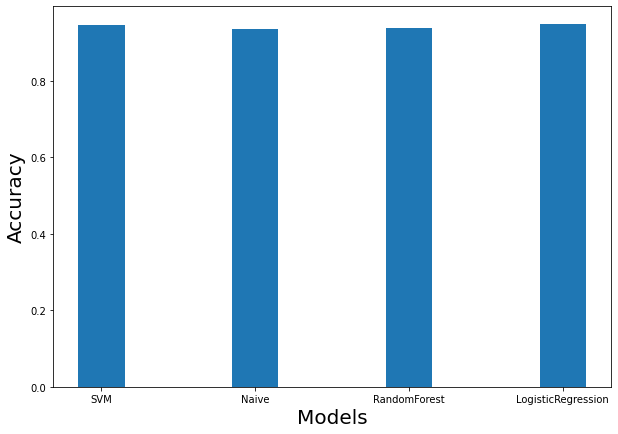

In [34]:
plt.figure(figsize=(10,7))
plt.bar(['SVM','Naive','RandomForest','LogisticRegression'],plot_y,width=0.3)
plt.xlabel('Models',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.show()
